In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))

matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
df = pd.read_csv("creditcardcsvpresent.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

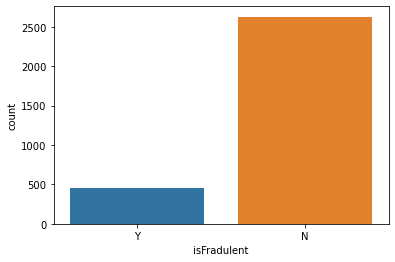

In [5]:
sns.countplot(x='isFradulent', data=df);

In [6]:
pd.isnull(df).sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

In [7]:
df['Is declined']=df['Is declined'].replace('N',0)
df['Is declined']=df['Is declined'].replace('Y',1)

In [8]:
df['isForeignTransaction']=df['isForeignTransaction'].replace('N',0)
df['isForeignTransaction']=df['isForeignTransaction'].replace('Y',1)

In [9]:
df['isHighRiskCountry']=df['isHighRiskCountry'].replace('N',0)
df['isHighRiskCountry']=df['isHighRiskCountry'].replace('Y',1)

In [10]:
df['isFradulent']=df['isFradulent'].replace('N',0)
df['isFradulent']=df['isFradulent'].replace('Y',1)

In [11]:
df = df.drop(columns=["Merchant_id","Transaction date"])

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  3075 non-null   float64
 1   Transaction_amount              3075 non-null   float64
 2   Is declined                     3075 non-null   int64  
 3   Total Number of declines/day    3075 non-null   int64  
 4   isForeignTransaction            3075 non-null   int64  
 5   isHighRiskCountry               3075 non-null   int64  
 6   Daily_chargeback_avg_amt        3075 non-null   int64  
 7   6_month_avg_chbk_amt            3075 non-null   float64
 8   6-month_chbk_freq               3075 non-null   int64  
 9   isFradulent                     3075 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 240.4 KB


In [16]:
df.corr()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Average Amount/transaction/day,1.000000,0.587111,0.081184,-0.009682,0.047316,0.014604,0.060429,0.060284,0.071849,0.023504
Transaction_amount,0.587111,1.000000,0.197009,0.259309,0.276764,0.325397,0.252298,0.259663,0.297623,0.528913
Is declined,0.081184,0.197009,1.000000,0.115961,0.079761,0.127586,0.394083,0.407917,0.499365,0.271282
Total Number of declines/day,-0.009682,0.259309,0.115961,1.000000,0.227904,0.292459,0.094834,0.081138,0.085028,0.531990
isForeignTransaction,0.047316,0.276764,0.079761,0.227904,1.000000,0.489572,0.054798,0.060566,0.077083,0.478113
isHighRiskCountry,0.014604,0.325397,0.127586,0.292459,0.489572,1.000000,0.074902,0.073167,0.098241,0.639792
Daily_chargeback_avg_amt,0.060429,0.252298,0.394083,0.094834,0.054798,0.074902,1.000000,0.953663,0.884611,0.385964
6_month_avg_chbk_amt,0.060284,0.259663,0.407917,0.081138,0.060566,0.073167,0.953663,1.000000,0.851339,0.375758
6-month_chbk_freq,0.071849,0.297623,0.499365,0.085028,0.077083,0.098241,0.884611,0.851339,1.000000,0.443824
isFradulent,0.023504,0.528913,0.271282,0.531990,0.478113,0.639792,0.385964,0.375758,0.443824,1.000000


<AxesSubplot:>

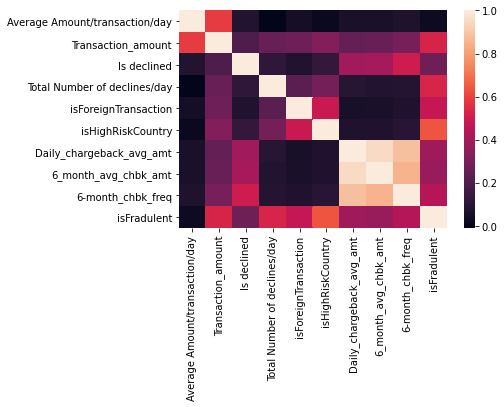

In [15]:
sns.heatmap(df.corr())

In [22]:
# Distribution of normal transactions amount

<AxesSubplot:ylabel='Frequency'>

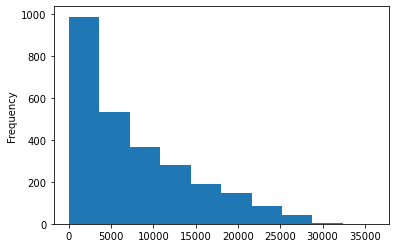

In [20]:
df[df['isFradulent'] == 0].Transaction_amount.plot.hist()

<AxesSubplot:ylabel='Frequency'>

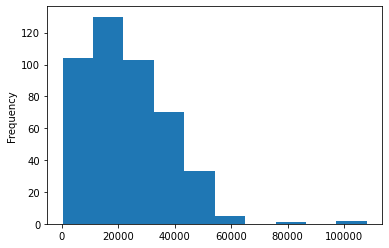

In [23]:
df[df['isFradulent'] == 1].Transaction_amount.plot.hist()

In [24]:
df.to_csv("df_clean.csv",sep=',')